In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
with open("../data/ltr-training-data3.json") as file:
    raw_data = json.load(file)
    for idx, query in enumerate(raw_data):
        # features = {item['name']: item['value'] for item in query['features']}
        raw_data[idx] = {**query, **query['features']}

    df = pd.DataFrame(raw_data)

In [4]:
df['queryId'] = pd.factorize(df['searchTerm'])[0]

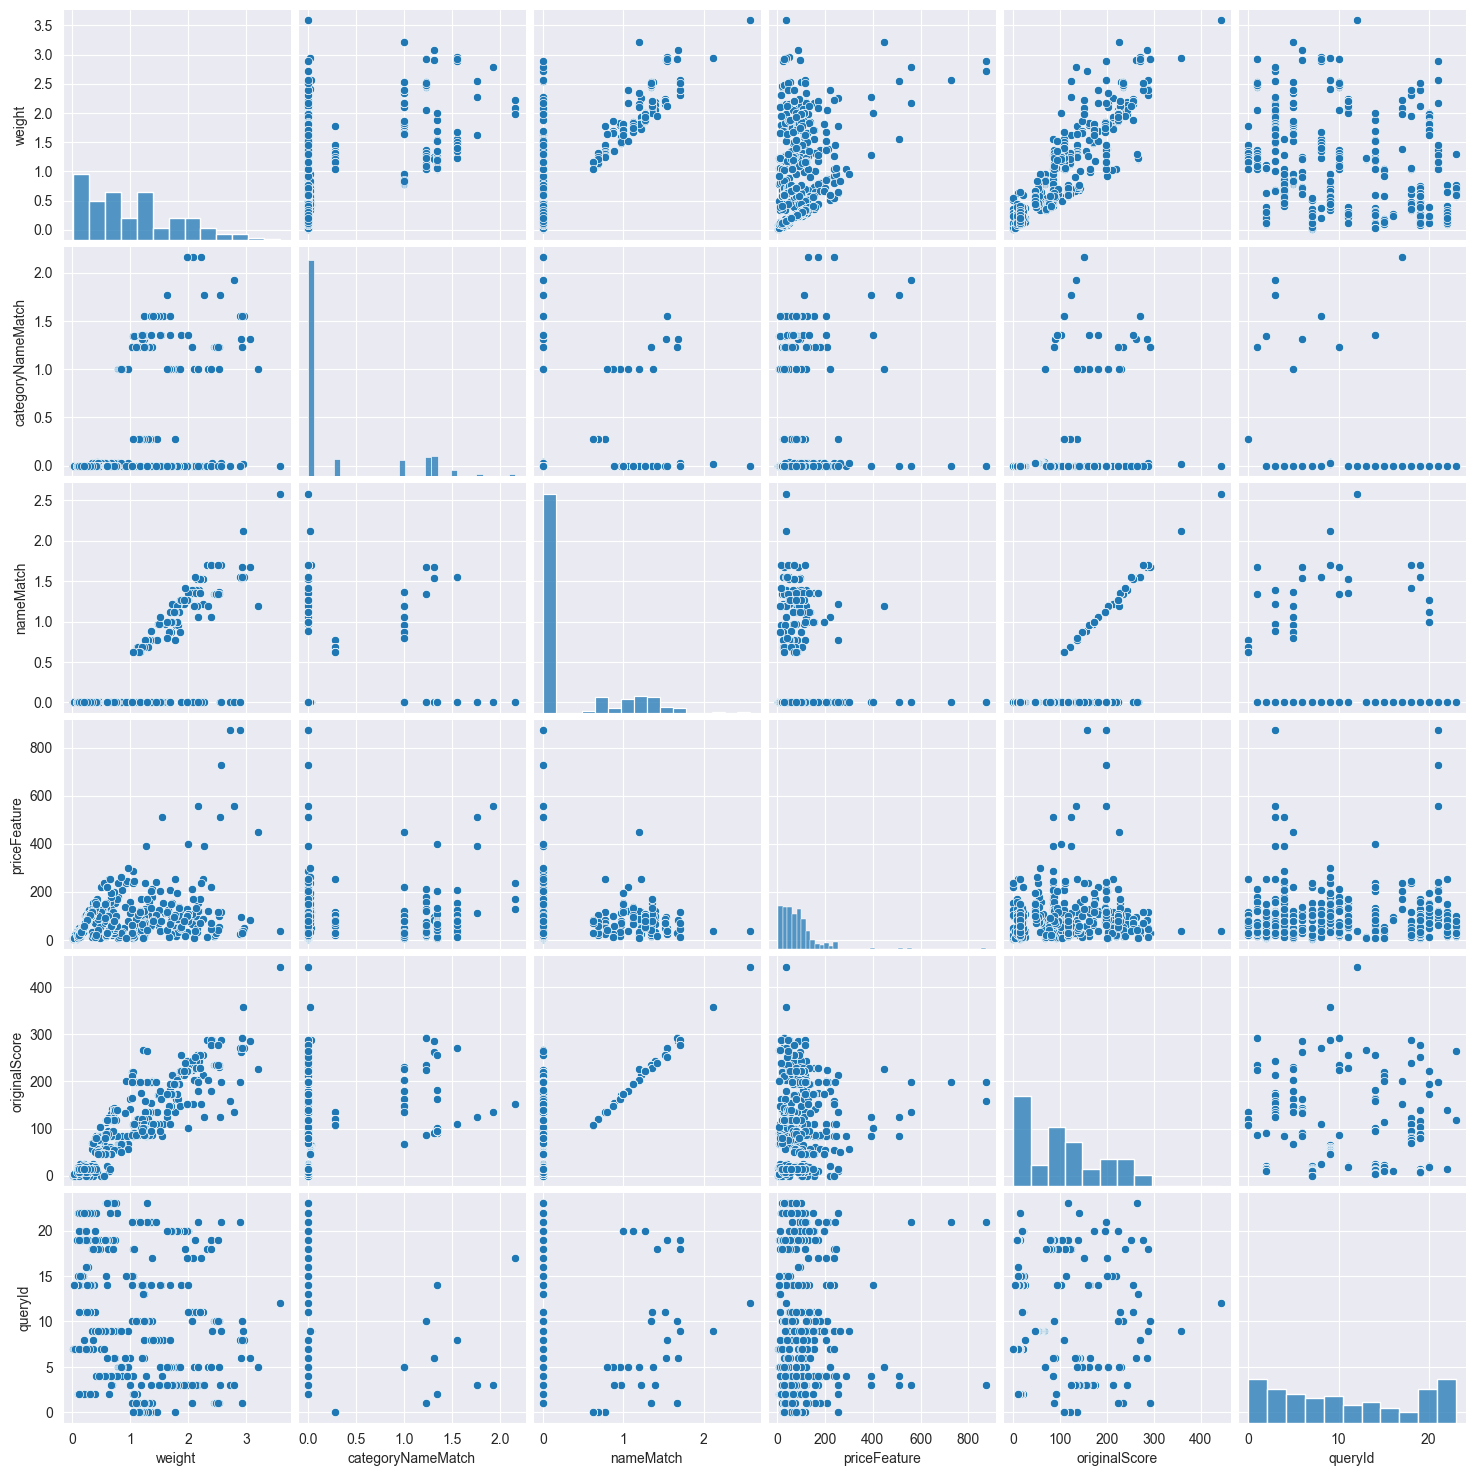

In [5]:
sns.pairplot(df)

In [6]:
display(df)

,searchTerm,productCode,weight,features,categoryNameMatch,nameMatch,priceFeature,originalScore,queryId
0,drill,3887529,1.373782,"{'categoryNameMatch': 0.27647737, 'nameMatch':...",0.276477,0.773474,81.0,135.358020,0
1,drill,3887483,1.454057,"{'categoryNameMatch': 0.27647737, 'nameMatch':...",0.276477,0.773474,116.0,135.358020,0
2,drill,3887477,1.770571,"{'categoryNameMatch': 0.27647737, 'nameMatch':...",0.276477,0.773474,254.0,135.358020,0
3,drill,3887475,1.261397,"{'categoryNameMatch': 0.27647737, 'nameMatch':...",0.276477,0.773474,32.0,135.358020,0
4,drill,3884646,1.348553,"{'categoryNameMatch': 0.27647737, 'nameMatch':...",0.276477,0.773474,70.0,135.358020,0
...,...,...,...,...,...,...,...,...,...
520,einhell,3880517,0.679366,"{'categoryNameMatch': 0.0, 'nameMatch': 0.0, '...",0.000000,0.000000,64.0,117.957535,23
521,einhell,3880504,0.628908,"{'categoryNameMatch': 0.0, 'nameMatch': 0.0, '...",0.000000,0.000000,42.0,117.957535,23
522,einhell,3879445,0.667898,"{'categoryNameMatch': 0.0, 'nameMatch': 0.0, '...",0.000000,0.000000,59.0,117.957535,23
523,einhell,3879444,0.713770,"{'categoryNameMatch': 0.0, 'nameMatch': 0.0, '...",0.000000,0.000000,79.0,117.957535,23


array([[<Axes: title={'center': 'weight'}>]], dtype=object)

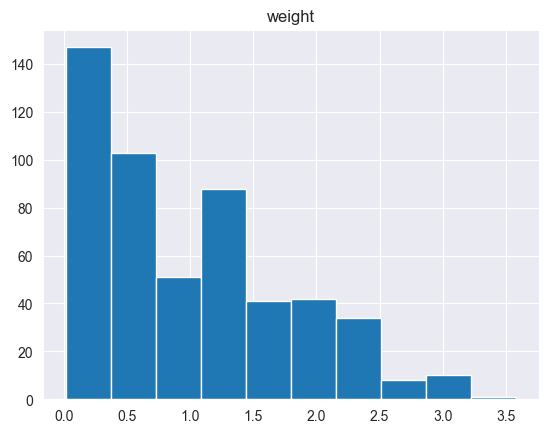

In [7]:
df.hist(column='weight')

In [8]:
query_counts = df['queryId'].value_counts()
valid_query_ids = query_counts[query_counts > 1].index
df = df[df['queryId'].isin(valid_query_ids)]

In [9]:
conditions = [
    df['weight'] < 0.33,
    df['weight'] < 0.66
]
choices = [0, 1]

# Assign new column
df.loc[:, 'label'] = np.select(conditions, choices, default=2)
df.loc[:, 'label'] = df['label'].astype(int)

/var/folders/01/65v7rpx91ls31v61mf73k13c0000gn/T/ipykernel_77201/2951191189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'label'] = np.select(conditions, choices, default=2)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 0 to 524
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   searchTerm         524 non-null    object 
 1   productCode        524 non-null    object 
 2   weight             524 non-null    float64
 3   features           524 non-null    object 
 4   categoryNameMatch  524 non-null    float64
 5   nameMatch          524 non-null    float64
 6   priceFeature       524 non-null    float64
 7   originalScore      524 non-null    float64
 8   queryId            524 non-null    int64  
 9   label              524 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 45.0+ KB


In [11]:
display(df)

,searchTerm,productCode,weight,features,categoryNameMatch,nameMatch,priceFeature,originalScore,queryId,label
0,drill,3887529,1.373782,"{'categoryNameMatch': 0.27647737, 'nameMatch':...",0.276477,0.773474,81.0,135.358020,0,2
1,drill,3887483,1.454057,"{'categoryNameMatch': 0.27647737, 'nameMatch':...",0.276477,0.773474,116.0,135.358020,0,2
2,drill,3887477,1.770571,"{'categoryNameMatch': 0.27647737, 'nameMatch':...",0.276477,0.773474,254.0,135.358020,0,2
3,drill,3887475,1.261397,"{'categoryNameMatch': 0.27647737, 'nameMatch':...",0.276477,0.773474,32.0,135.358020,0,2
4,drill,3884646,1.348553,"{'categoryNameMatch': 0.27647737, 'nameMatch':...",0.276477,0.773474,70.0,135.358020,0,2
...,...,...,...,...,...,...,...,...,...,...
520,einhell,3880517,0.679366,"{'categoryNameMatch': 0.0, 'nameMatch': 0.0, '...",0.000000,0.000000,64.0,117.957535,23,2
521,einhell,3880504,0.628908,"{'categoryNameMatch': 0.0, 'nameMatch': 0.0, '...",0.000000,0.000000,42.0,117.957535,23,1
522,einhell,3879445,0.667898,"{'categoryNameMatch': 0.0, 'nameMatch': 0.0, '...",0.000000,0.000000,59.0,117.957535,23,2
523,einhell,3879444,0.713770,"{'categoryNameMatch': 0.0, 'nameMatch': 0.0, '...",0.000000,0.000000,79.0,117.957535,23,2


In [12]:
X = df.drop(columns=['searchTerm', 'productCode', 'weight', 'features', 'label'])
y = df['label']
assert len(X) == len(y)

In [13]:
from sklearn.model_selection import train_test_split

# Optional: split into train/test (use same query groups!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=df['queryId'])

X_train = X_train.sort_values(by=['queryId'])
X_test = X_test.sort_values(by=['queryId'])

group_train = X_train.groupby("queryId").size().to_list()
group_test = X_test.groupby("queryId").size().to_list()

assert sum(group_train) == len(X_train), f"Group sum {sum(group_train)} not equal  nrows {len(X_train)}"

In [14]:
y_train.value_counts()

label
2    269
0    122
1     80
Name: count, dtype: int64

In [15]:
X_train = X_train.drop(columns=['queryId'])
X_test = X_test.drop(columns=['queryId'])

In [16]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train, group=group_train)

params = {
    'objective': 'lambdarank',
    'metric': 'ndcg',
    'ndcg_eval_at': [1, 3],
    'learning_rate': 0.1,
    'num_leaves': 5,
    'min_data_in_leaf': 1,
}

model = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 471, number of used features: 4


In [36]:
import json

source_trees = model.dump_model()

# json.dumps(modelDic)
featureNames = source_trees["feature_names"]
target_Dic = {"class": "org.apache.solr.ltr.model.MultipleAdditiveTreesModel", "name": "multipleadditivetreesmodel"}
targetFeatures = []

for featureName in featureNames:
    targetFeatures.append({"name": featureName})
target_Dic["features"] = targetFeatures
json.dumps(target_Dic)


def create_leaf_node(source_tree): return {"value": source_tree["leaf_value"]}

def create_node_structure(source_tree):
    if "leaf_index" in source_tree:
        leaf = create_leaf_node(source_tree)
        return leaf

    target_node = {}
    feature_name = targetFeatures[source_tree["split_feature"]]
    threshold = source_tree["threshold"]
    target_node["feature"] = feature_name["name"]
    target_node["threshold"] = threshold

    if "left_child" in source_tree:
        left_tree = create_node_structure(source_tree["left_child"])
        target_node["left"] = left_tree

    if "right_child" in source_tree:
        right_tree = create_node_structure(source_tree["right_child"])
        target_node["right"] = right_tree

    return target_node


# source_tree = source_trees["tree_info"][0]
target_trees = []
for source_tree in source_trees["tree_info"]:
    node_structure = create_node_structure(source_tree["tree_structure"])
    target_trees.append({"weight": 1, "root": node_structure})

target_Dic["params"] = {"trees": target_trees}

json.dumps(target_Dic)







# for key, value in dump_model.items():
# print(key, value)

'{"class": "org.apache.solr.ltr.model.MultipleAdditiveTreesModel", "name": "multipleadditivetreesmodel", "features": [{"name": "categoryNameMatch"}, {"name": "nameMatch"}, {"name": "priceFeature"}, {"name": "originalScore"}], "params": {"trees": [{"weight": 1, "root": {"feature": "priceFeature", "threshold": 63.50000000000001, "left": {"feature": "categoryNameMatch", "threshold": 1.32910915, "left": {"value": -0.01749208989314987}, "right": {"value": -0.11698019319378777}}, "right": {"feature": "priceFeature", "threshold": 78.50000000000001, "left": {"value": 0.10522006239734155}, "right": {"feature": "categoryNameMatch", "threshold": 1.4508669500000002, "left": {"value": -0.0026311393161284734}, "right": {"value": 0.12189257034539316}}}}}, {"weight": 1, "root": {"feature": "priceFeature", "threshold": 130.50000000000003, "left": {"value": -0.014792309161233792}, "right": {"feature": "priceFeature", "threshold": 156.00000000000003, "left": {"value": 0.15031690118497432}, "right": {"fea

In [17]:
pred = model.predict(data=X_test)
print("Len pred", len(pred))
print("Len X_test", len(X_test))
print(pred)

Len pred 53
Len X_test 53
[ 0.05125109  0.7213385  -0.03408062  0.18006998  1.50018687 -2.31510603
 -0.5268869  -2.31510603  0.54134924 -0.51234007  0.0931086  -0.10707359
 -0.60819498  0.07064617 -0.32895075 -0.56751848 -0.16526249 -0.16734834
 -0.06407551 -1.45622034 -1.80266476 -1.03195626  1.01838893 -0.37442991
 -0.16526249  0.0955849  -0.50121354  0.18006998  0.07064617 -0.05741129
 -0.2436963  -0.57570621  0.40677871 -0.11911035 -0.24492958  0.7213385
 -0.19742826 -0.18276061 -0.78902357 -0.7257544  -0.05666215 -0.05666215
 -0.2834784   0.47579187  1.07175212  0.33236836  2.75015795 -0.20409921
 -0.44770092 -0.44770092  0.7213385   0.76109487 -0.40214986]


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['searchTerm', 'productCode', 'weight', 'features', 'label'])
y = df['weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
results = X_test.copy()
results['true_relevance'] = y_test
results['predicted_score'] = y_pred

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

# display(results)



MSE:  0.004587632071112446
RandomForestRegressor(random_state=42)
